Usage example of MediaPipe Hands Solution API in Python (see also http://solutions.mediapipe.dev/hands).

In [ ]:
!pip install numpy==1.19.3
!pip install mediapipe

Upload any image that contains hand(s) to the Colab. We took two examples from the web: https://unsplash.com/photos/QyCH5jwrD_A and https://unsplash.com/photos/tSePVHkxUCk


In [ ]:
from google.colab import files

uploaded = files.upload()

Saving annie-spratt-tSePVHkxUCk-unsplash.jpg to annie-spratt-tSePVHkxUCk-unsplash.jpg
Saving kira-auf-der-heide-QyCH5jwrD_A-unsplash.jpg to kira-auf-der-heide-QyCH5jwrD_A-unsplash.jpg


annie-spratt-tSePVHkxUCk-unsplash.jpg


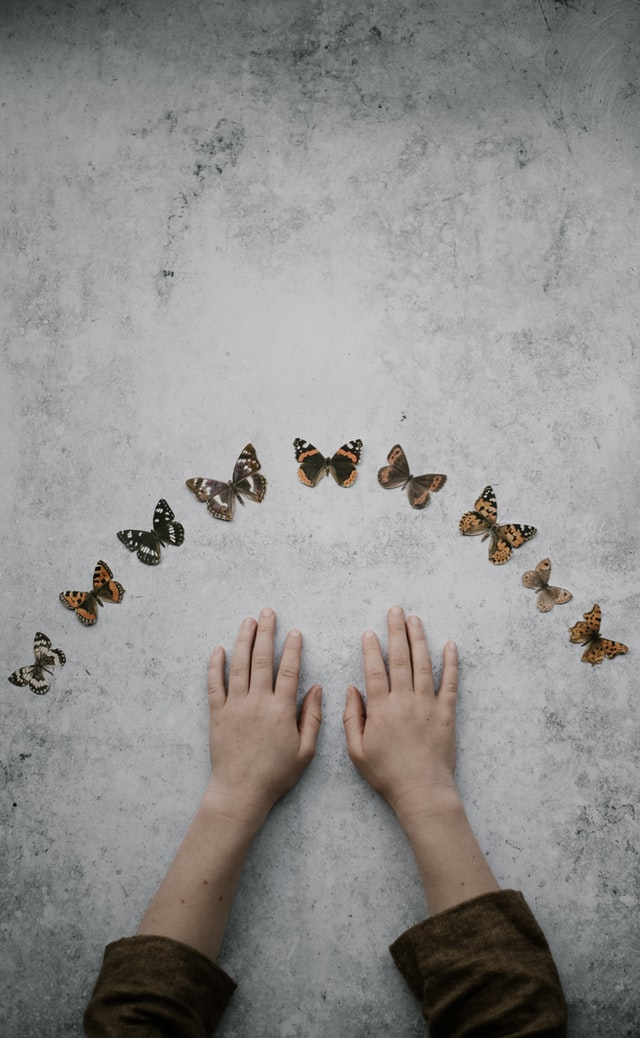

kira-auf-der-heide-QyCH5jwrD_A-unsplash.jpg


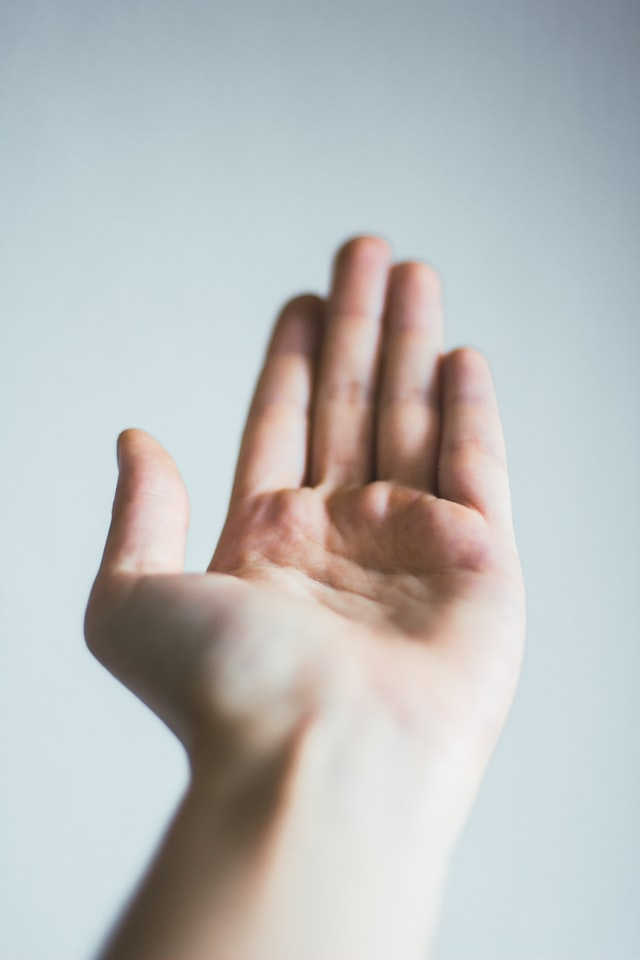

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

# Read images with OpenCV.
images = {name: cv2.imread(name) for name in uploaded.keys()}

# Preview the images.
for name, image in images.items():
  print(name)   
  cv2_imshow(image)

All MediaPipe Solutions Python API examples are under mp.solutions.

For the MediaPipe Hands solution, we can access this module as `mp_hands = mp.solutions.hands`.

You may change the parameters, such as `static_image_mode`, `max_num_hands`, and `min_detection_confidence`, during the initialization. Run `help(mp_hands.Hands)` to get more informations about the parameters.

In [ ]:
import mediapipe as mp
mp_hands = mp.solutions.hands

help(mp_hands.Hands)

# Initialize MediaPipe Hands.
hands = mp_hands.Hands(
    static_image_mode=True,
    max_num_hands=2,
    min_detection_confidence=0.7)

Help on class Hands in module mediapipe.python.solutions.hands:

class Hands(mediapipe.python.solution_base.SolutionBase)
 |  MediaPipe Hands.
 |  
 |  MediaPipe Hands processes an RGB image and returns the hand landmarks and
 |  handedness (left v.s. right hand) of each detected hand.
 |  
 |  Note that it determines handedness assuming the input image is mirrored,
 |  i.e., taken with a front-facing/selfie camera (
 |  https://en.wikipedia.org/wiki/Front-facing_camera) with images flipped
 |  horizontally. If that is not the case, use, for instance, cv2.flip(image, 1)
 |  to flip the image first for a correct handedness output.
 |  
 |  Please refer to https://solutions.mediapipe.dev/hands#python-solution-api for
 |  usage examples.
 |  
 |  Method resolution order:
 |      Hands
 |      mediapipe.python.solution_base.SolutionBase
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, static_image_mode=False, max_num_hands=2, min_detection_confidence=0.5, min_

Handedness of annie-spratt-tSePVHkxUCk-unsplash.jpg:
[classification {
  index: 1
  score: 0.6489508152008057
  label: "Right"
}
, classification {
  index: 0
  score: 0.956430196762085
  label: "Left"
}
]
Hand landmarks of annie-spratt-tSePVHkxUCk-unsplash.jpg:
Index finger tip coordinate: ( 269.5133399963379, 635.1329913139343)
Index finger tip coordinate: ( 343.1874084472656, 631.4781053066254)


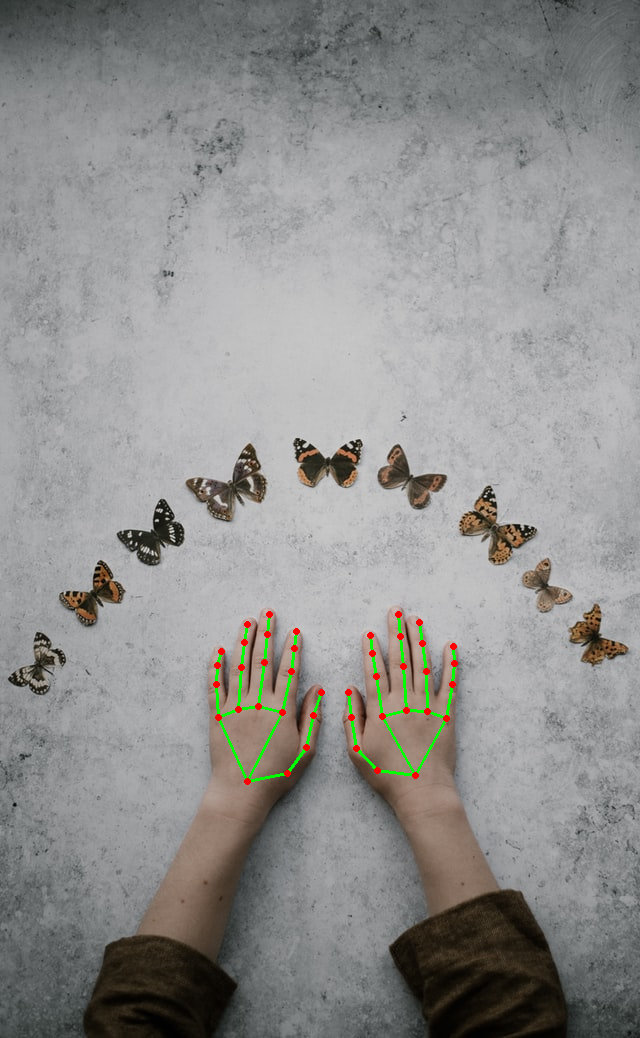

Handedness of kira-auf-der-heide-QyCH5jwrD_A-unsplash.jpg:
[classification {
  index: 0
  score: 0.999998927116394
  label: "Left"
}
]
Hand landmarks of kira-auf-der-heide-QyCH5jwrD_A-unsplash.jpg:
Index finger tip coordinate: ( 326.38599395751953, 297.1281051635742)


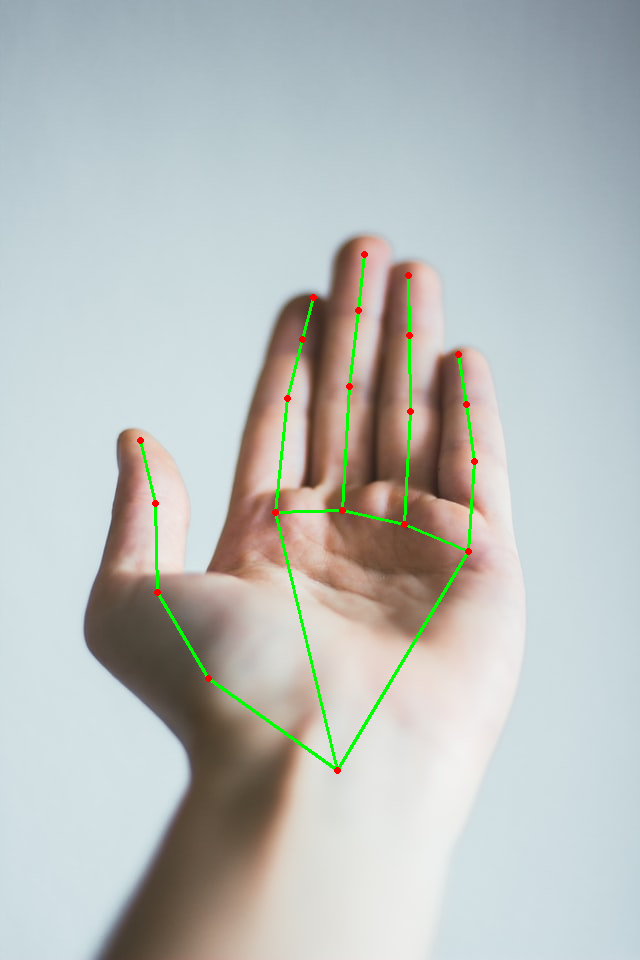

In [ ]:
mp_drawing = mp.solutions.drawing_utils 

for name, image in images.items():
  # Convert the BGR image to RGB, flip the image around y-axis for correct 
  # handedness output and process it with MediaPipe Hands.
  results = hands.process(cv2.flip(cv2.cvtColor(image, cv2.COLOR_BGR2RGB), 1))
  image_hight, image_width, _ = image.shape
  # Print handedness (left v.s. right hand).
  print(f'Handedness of {name}:')
  print(results.multi_handedness)

  # Draw hand landmarks of each hand.
  print(f'Hand landmarks of {name}:')
  if not results.multi_hand_landmarks:
    continue
  annotated_image = cv2.flip(image.copy(), 1)
  for hand_landmarks in results.multi_hand_landmarks:
    # Print index finger tip coordinates.
    print(
        f'Index finger tip coordinate: (',
        f'{hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].x * image_width}, '
        f'{hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].y * image_hight})'
    )
    mp_drawing.draw_landmarks(
        annotated_image, hand_landmarks, mp_hands.HAND_CONNECTIONS)
  cv2_imshow(cv2.flip(annotated_image, 1))